In [1]:
# W&B Miner Performance Analysis

import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data import (
    get_wandb_runs,
    get_unique_validator_run_names,
    compute_miner_performance,
    download_challenge_media,
    merge_performance_and_downloads
)



In [3]:
# Set NETWORK for `project` to be set accordingly 
NETWORK = 'finney'  # or 'test'

entity = "bitmindai"
project = "bitmind-subnet" if NETWORK == 'finney' else 'bitmind'

# Time range settings
start_date = datetime.datetime(2025, 2, 24)  # Change to your desired start date
end_date = datetime.datetime(2025, 2, 25)    # Change to your desired end date

# Filtering settings
validator_run_name = 'validator-236-2.2.0'  # Optionally specify a run name
miner_uid = None                            # Optionally specify a specific miner UID


## Get W&B Runs

In [4]:
# Get all W&B runs within the specified time range
print(f"Fetching W&B runs from {entity}/{project} between {start_date.date()} and {end_date.date()}")
runs = get_wandb_runs(
    entity=entity,
    project=project,
    start_ts=start_date,
    end_ts=end_date,
    validator_run_name=validator_run_name
)

print(f"Found {len(runs)} runs")

# If you're curious about available run names
run_names = get_unique_validator_run_names(
    entity=entity,
    project=project,
    start_ts=start_date,
    end_ts=end_date
)

print(f"Available run names: {run_names}")


Fetching W&B runs from bitmindai/bitmind-subnet between 2025-02-24 and 2025-02-25
Querying W&B with filters: {'display_name': 'validator-236-2.2.0', 'created_at': {'$gte': '2025-02-24T00:00:00', '$lte': '2025-02-25T00:00:00'}}
Found 9 runs
Querying bitmindai/bitmind-subnet with filters: {'created_at': {'$gte': '2025-02-24T00:00:00', '$lte': '2025-02-25T00:00:00'}}
Available run names: {'data-generator-254-2.2.0', 'data-generator-166-2.2.0', 'data-generator-19-2.2.0', 'data-generator-6-2.2.0', 'validator-140-2.2.0', 'cache-updater-19-2.2.0', 'cache-updater-140-2.2.0', 'cache-updater-254-2.2.0', 'validator-166-2.2.0', 'cache-updater-135-2.2.0', 'data-generator-236-2.2.0', 'data-generator-160-2.2.0', 'cache-updater-160-2.2.0', 'validator-19-2.2.0', 'validator-135-2.2.0', 'data-generator-140-2.2.0', 'cache-updater-166-2.2.0', 'cache-updater-236-2.2.0', 'validator-254-2.2.0', 'validator-6-2.2.0', 'cache-updater-6-2.2.0', 'validator-160-2.2.0', 'validator-236-2.2.0', 'data-generator-135-2.2.

## Miner Performance Metrics

In [5]:
print("Computing miner performance metrics...")
perf_results = compute_miner_performance(
    wandb_validator_runs=runs,
    miner_uid=miner_uid,
    start_ts=start_date,
    end_ts=end_date,
    validator_run_name=validator_run_name
)
predictions_df = perf_results['predictions']
performance_df = perf_results['performance']
print("Done.")

Computing miner performance metrics...
Done.



Predictions sample:


,modality,uid,prediction,label,wandb_filepath,challenge_id,timestamp
0,video,11,"[1, 0, 0]",0,media/videos/video_112_021f4f45a0b7e85832ee.gif,,1.740384e+09
1,video,2,"[0.9917955817189068, 0.00820441828109324, 0]",0,media/videos/video_112_021f4f45a0b7e85832ee.gif,,1.740384e+09
2,video,142,"[0.9915437108371407, 0.00845628916285932, 0]",0,media/videos/video_112_021f4f45a0b7e85832ee.gif,,1.740384e+09
3,video,122,"[0.9915437108371407, 0.00845628916285932, 0]",0,media/videos/video_112_021f4f45a0b7e85832ee.gif,,1.740384e+09
4,video,255,"[0.9915437108371407, 0.00845628916285932, 0]",0,media/videos/video_112_021f4f45a0b7e85832ee.gif,,1.740384e+09



Per-miner performance metrics:


,multiclass_accuracy,multiclass_precision,multiclass_recall,multiclass_f1,multiclass_mcc,binary_accuracy,binary_precision,binary_recall,binary_f1,binary_auc,binary_mcc,sample_size,uid,modality
0,0.958904,0.958048,0.958904,0.958022,0.931363,0.958904,0.975610,0.952381,0.963855,0.993856,0.916610,73,0,image
1,0.972973,0.974434,0.972973,0.972993,0.947331,0.972973,0.945946,1.000000,0.972222,0.999267,0.947331,74,0,video
2,0.977011,0.977306,0.977011,0.976748,0.960829,0.977011,0.978723,0.978723,0.978723,0.998404,0.953723,87,1,image
3,0.972603,0.972603,0.972603,0.972603,0.944947,0.972603,0.970588,0.970588,0.970588,0.999246,0.944947,73,1,video
4,0.959459,0.964535,0.959459,0.961467,0.925132,0.959459,0.939394,0.968750,0.953846,0.997024,0.918062,74,2,image


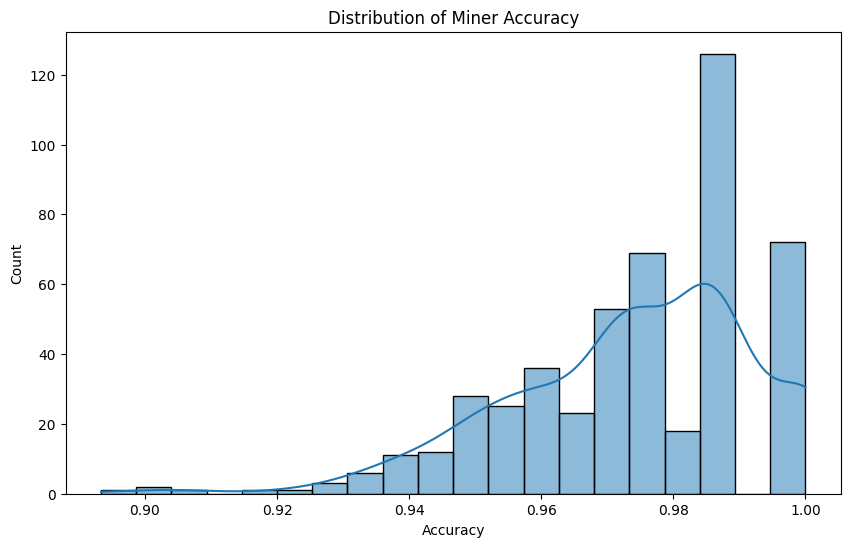


Average performance by modality:


,multiclass_accuracy,multiclass_precision,multiclass_recall,multiclass_f1,multiclass_mcc,binary_accuracy,binary_precision,binary_recall,binary_f1,binary_auc,binary_mcc,sample_size,uid
modality,,,,,,,,,,,,,
image,0.972188,0.973724,0.972188,0.972191,0.952273,0.972744,0.970648,0.978011,0.974049,0.993331,0.945369,71.926230,126.52459
video,0.975672,0.976300,0.975672,0.975649,0.951348,0.975672,0.980245,0.968092,0.973786,0.989535,0.951348,73.770492,126.52459


In [6]:
# Display a sample of the predictions
print("\nPredictions sample:")
display(predictions_df.head())

# Display the performance metrics
print("\nPer-miner performance metrics:")
display(performance_df.head())

# If looking at multiple miners, look at average performance
if miner_uid is None:
    plt.figure(figsize=(10, 6))
    sns.histplot(performance_df['binary_accuracy'], bins=20, kde=True)
    plt.title('Distribution of Miner Accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Count')
    plt.show()

    print("\nAverage performance by modality:")
    modality_perf = performance_df.groupby('modality').mean()
    display(modality_perf)

## Optionally Download Media

In [8]:
# Download settings
download_media = True      # Set to False to skip media downloads
download_dir = "./downloads"
download_images = True
download_videos = True
download_limit = 10        # Limit to 10 files (change as needed)

# Create downloads directory if needed
if download_media and not os.path.exists(download_dir):
    os.makedirs(download_dir)



In [9]:
download_df = None
if download_media:
    print(f"\nDownloading media files to {download_dir}...")
    
    download_df = download_challenge_media(
        wandb_validator_runs=runs,
        download_dest=download_dir,
        download_images=download_images,
        download_videos=download_videos,
        download_limit=download_limit,
        miner_uid=miner_uid,
        start_ts=start_date,
        end_ts=end_date,
        validator_run_name=validator_run_name
    )
    
    print(f"Downloaded media info:")
    display(download_df.head())
    
    # Count media types
    media_counts = download_df['modality'].value_counts()
    print(f"\nMedia counts by type:")
    display(media_counts)


# Add local filepaths of downloaded media to predictions df
if download_df is not None:
    print("\nMerging predictions and download filepaths...")
    merged_results = merge_performance_and_downloads(
        predictions_df=perf_results['predictions'],
        download_df=download_df
    )
    downloaded_count = len(merged_results[merged_results['local_filepath'] != 'not downloaded'])
    print(f"\nTotal predictions with downloaded media: {downloaded_count}")
else:
    merged_results = perf_results
    print("\nNo media downloads - using original performance results")
#


Failed to download video: 'NoneType' object is not subscriptable
Downloaded media info:


,challenge_id,modality,uid,wandb_filepath,local_filepath,timestamp
0,,video,11,media/videos/video_112_021f4f45a0b7e85832ee.gif,./downloads/media/videos/video_112_021f4f45a0b...,1.740384e+09
1,,video,2,media/videos/video_112_021f4f45a0b7e85832ee.gif,./downloads/media/videos/video_112_021f4f45a0b...,1.740384e+09
2,,video,142,media/videos/video_112_021f4f45a0b7e85832ee.gif,./downloads/media/videos/video_112_021f4f45a0b...,1.740384e+09
3,,video,122,media/videos/video_112_021f4f45a0b7e85832ee.gif,./downloads/media/videos/video_112_021f4f45a0b...,1.740384e+09
4,,video,255,media/videos/video_112_021f4f45a0b7e85832ee.gif,./downloads/media/videos/video_112_021f4f45a0b...,1.740384e+09



Media counts by type:


modality
video    3500
image     250
Name: count, dtype: int64


Merging predictions and download filepaths...

Total predictions with downloaded media: 500


In [10]:
merged_results

,modality,uid,prediction,label,wandb_filepath,challenge_id,timestamp,local_filepath
0,video,11,"[1, 0, 0]",0,media/videos/video_112_021f4f45a0b7e85832ee.gif,,1.740384e+09,./downloads/media/videos/video_112_021f4f45a0b...
1,video,2,"[0.9917955817189068, 0.00820441828109324, 0]",0,media/videos/video_112_021f4f45a0b7e85832ee.gif,,1.740384e+09,./downloads/media/videos/video_112_021f4f45a0b...
2,video,142,"[0.9915437108371407, 0.00845628916285932, 0]",0,media/videos/video_112_021f4f45a0b7e85832ee.gif,,1.740384e+09,./downloads/media/videos/video_112_021f4f45a0b...
3,video,122,"[0.9915437108371407, 0.00845628916285932, 0]",0,media/videos/video_112_021f4f45a0b7e85832ee.gif,,1.740384e+09,./downloads/media/videos/video_112_021f4f45a0b...
4,video,255,"[0.9915437108371407, 0.00845628916285932, 0]",0,media/videos/video_112_021f4f45a0b7e85832ee.gif,,1.740384e+09,./downloads/media/videos/video_112_021f4f45a0b...
...,...,...,...,...,...,...,...,...
35545,image,1,"[0.9978482723236084, 0.0019714077934622765, 0....",0,media/images/image_143_81bdd5197c8a09513804.png,,1.740452e+09,not downloaded
35546,image,255,"[0.9978482723236084, 0.0019714077934622765, 0....",0,media/images/image_143_81bdd5197c8a09513804.png,,1.740452e+09,not downloaded
35547,image,20,"[0.9978482723236084, 0.0019714077934622765, 0....",0,media/images/image_143_81bdd5197c8a09513804.png,,1.740452e+09,not downloaded
35548,image,206,"[0.9978482723236084, 0.0019714077934622765, 0....",0,media/images/image_143_81bdd5197c8a09513804.png,,1.740452e+09,not downloaded


In [12]:
# Save the predictions dataframe
predictions_csv = "miner_predictions.csv"
merged_results.to_csv(predictions_csv, index=False)
print(f"\nSaved predictions to {predictions_csv}")

# Save the performance metrics dataframe
performance_csv = "miner_performance.csv"
merged_results.to_csv(performance_csv, index=False)
print(f"Saved performance metrics to {performance_csv}")


Saved predictions to miner_predictions.csv
Saved performance metrics to miner_performance.csv


In [ ]:
merged_results